<a href="https://colab.research.google.com/github/Szkieletor37/Colaboratory/blob/main/nishika/precedent_pii_masking_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!python --version

Python 3.12.11


In [3]:
!pip install -U ginza ja_ginza --no-cache-dir --timeout=600

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 153.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 MB 147.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 183.5 MB/s eta 0:00:00


In [4]:
!pip install glob2==0.7 tqdm

In [5]:
!pip list | grep ginza

ginza                                 5.2.0
ja-ginza                              5.2.0


In [6]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

import spacy
from spacy.tokens import Doc
from collections import Counter

import warnings
import tqdm



In [7]:
files = glob.glob("/content/drive/MyDrive/Nishika/判例の自動マスキング/train/train/*.jsonl")

In [8]:
files

['/content/drive/MyDrive/Nishika/判例の自動マスキング/train/train/89285.jsonl',
 '/content/drive/MyDrive/Nishika/判例の自動マスキング/train/train/89532.jsonl',
 '/content/drive/MyDrive/Nishika/判例の自動マスキング/train/train/89483.jsonl',
 '/content/drive/MyDrive/Nishika/判例の自動マスキング/train/train/89533.jsonl',
 '/content/drive/MyDrive/Nishika/判例の自動マスキング/train/train/89442.jsonl',
 '/content/drive/MyDrive/Nishika/判例の自動マスキング/train/train/89396.jsonl',
 '/content/drive/MyDrive/Nishika/判例の自動マスキング/train/train/89647.jsonl',
 '/content/drive/MyDrive/Nishika/判例の自動マスキング/train/train/89366.jsonl',
 '/content/drive/MyDrive/Nishika/判例の自動マスキング/train/train/89242.jsonl',
 '/content/drive/MyDrive/Nishika/判例の自動マスキング/train/train/89413.jsonl',
 '/content/drive/MyDrive/Nishika/判例の自動マスキング/train/train/89407.jsonl',
 '/content/drive/MyDrive/Nishika/判例の自動マスキング/train/train/89653.jsonl',
 '/content/drive/MyDrive/Nishika/判例の自動マスキング/train/train/89511.jsonl',
 '/content/drive/MyDrive/Nishika/判例の自動マスキング/train/train/89417.jsonl',
 '/con

In [9]:
df_list = []

for file in files:
  data = pd.read_json(file, orient='records', lines=True)
  df_list.append(data)

combined_df = pd.concat(df_list, ignore_index=True)

# 'id' をキーにする
df = combined_df.set_index('id')

# 分析のために['meta']を2つの行に開く。
df['filename'] = df['meta'].apply(lambda x: x.get('filename'))
df['category'] = df['meta'].apply(lambda x: x.get('category'))

# 'meta' インデックスは削除。
df = df.drop("meta", axis=1)

# 'annotation_approver' インデックスは全てNaNなので削除
df = df.drop("annotation_approver", axis=1)

df

,text,labels,filename,category
id,,,,
346,令和2年1月29日判決言渡 平成30年(ネ)第10081号 不正競争行為差止等請求控訴事件 ...,"[[351, 355, PERSON], [364, 368, PERSON], [2277...",089285_hanrei.txt,知的財産裁判例
131,令和2年6月2日宣告 殺人被告事件 主 文 被告人を懲役15年に処する。 未決勾留日数中80...,"[[84, 88, PERSON], [151, 155, PERSON], [223, 2...",089532_hanrei.txt,下級裁裁判例
391,令和2年3月24日判決言渡 同日原本領収 裁判所書記官 平成29年(ワ)第24号 石木ダム建...,"[[816, 819, LOCATION], [834, 837, LOCATION], [...",089483_hanrei.txt,下級裁裁判例
130,"令和元年(行ヒ)第252号 国民健康保険税処分取消請求控訴,同附帯控訴事件 令和2年6月26...","[[1103, 1107, PERSON], [1393, 1397, PERSON], [...",089533_hanrei.txt,最高裁判例
208,傷害致死被告事件 令和2年3月13日 大阪高等裁判所第2刑事部判決 主 文 本件控訴を棄却す...,"[[137, 141, PERSON], [155, 159, PERSON], [311,...",089442_hanrei.txt,下級裁裁判例
...,...,...,...,...
42,平成31年1月15日判決言渡 平成29年(行ウ)第140号 一時金申請却下処分等取消請求事件...,"[[284, 287, LOCATION], [349, 352, LOCATION], [...",088850_hanrei.txt,行政事件裁判例
472,主 文 1 原判決を次のとおり変更する。 法務大臣が平成23年4月11日付けで第1審原告に対...,"[[6680, 6684, TIMEX], [8547, 8551, PERSON], [9...",089370_hanrei.txt,下級裁裁判例
262,平成27年 第1号 損害賠償請求事件 判 決 主 文 被告会社株式会社星雲及び被告榎本酉蔵は...,"[[31, 37, ORGFACPOS], [41, 45, PERSON], [49, 5...",089639_hanrei.txt,下級裁裁判例


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 346 to 306
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      145 non-null    object
 1   labels    145 non-null    object
 2   filename  145 non-null    object
 3   category  145 non-null    object
dtypes: object(4)
memory usage: 5.7+ KB


In [11]:
df.describe()

,text,labels,filename,category
count,145,145,145,145
unique,145,143,145,6
top,令和2年1月29日判決言渡 平成30年(ネ)第10081号 不正競争行為差止等請求控訴事件 ...,[],089285_hanrei.txt,下級裁裁判例
freq,1,3,1,81


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30693 (\N{CJK UNIFIED IDEOGRAPH-77E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36001 (\N{CJK UNIFIED IDEOGRAPH-8CA1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29987 (\N{CJK UNIFIED IDEOGRAPH-7523}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35009 (\N{CJK UNIFIED IDEOGRAPH-88C1}) missing from font(s) DejaVu Sans.
  fig.canvas

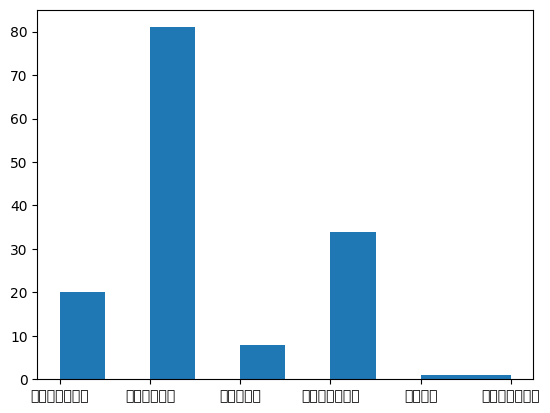

In [12]:
# カテゴリごとのデータ数をヒストグラム化
plt.hist(df['category'])
plt.show()

In [13]:
# カテゴリごとの件数をカウント
df['category'].value_counts()

,count
category,
下級裁裁判例,81
行政事件裁判例,34
知的財産裁判例,20
最高裁判例,8
高裁判例,1
労働事件裁判例,1


In [14]:
# 各ラベルの数や固有表現の傾向の可視化のために、{抽出された表現, ラベル, filename}の新しいDataFrame を作成
entities = []
labels = []
file_names = []

count = 0

# df を1行ずつ処理
for index, rows in df.iterrows():
  text = rows["text"]
  ner_labels = rows["labels"]
  file_name = rows["filename"]

  for label_info in ner_labels:
    start_pos, end_pos, entity_label = label_info
    entity_text = text[start_pos:end_pos]
    entities.append(entity_text)
    labels.append(entity_label)
    file_names.append(file_name)

# extracted_entities_df に格納
extracted_entities_df = pd.DataFrame({
    "entity": entities,
    "label": labels,
    "file_name": file_names
})

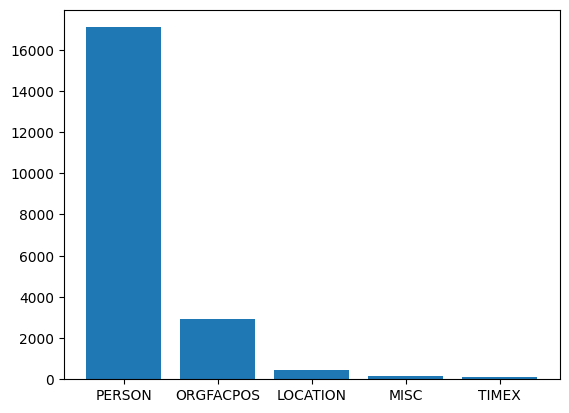

In [15]:
# ラベルの件数を集計
label_counts = extracted_entities_df["label"].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.show()

In [16]:
import re

# text を句点（。）で文単位に分割して、かつ位置も返す関数
def split_to_sentences(text):

    sentences = []
    pattern = r'(.*?。)'

    for match in re.finditer(pattern, text):
        sentence = match.group(0)
        start_pos = match.start()
        end_pos = match.end()

        sentences.append((sentence, start_pos, end_pos))

    return sentences

In [17]:
# n-gram 解析
# spacy で GiNZA のモデルをロード
nlp = spacy.load('ja_ginza')

for text, labels in zip(df['text'], df['labels']):

    # ラベル配列 labels 用のイテレータ
    labels_iter = 0

    #print(f"{label}, {label_start_pos}")
    #print(text[label_start_pos : label_end_pos])

    # text が長すぎて Sudachi でエラーが出るので句点で分割
    # 文の位置も取得
    sentences = split_to_sentences(text)

    for (sentence, sentence_start_pos, sentence_end_pos) in sentences:

        doc = nlp(sentence)

        #print(doc)
        break

        """
        double = []
        poses_to_exclude = ["NUM", "PUNCT", "SYM"]
        for i in range(len(doc) - 1):
            if doc[i].pos_ in poses_to_exclude or doc[i+1].pos_ in poses_to_exclude:
                continue
            double.append([doc[i], doc[i+1]])
        print(double)
        """

        #print(f"sentence_start_pos: {sentence_start_pos}, sentence_end_pos: {sentence_end_pos}")

        # 対象の固有表現が処理中の文に含まれる場合
        while labels[labels_iter][0] >= sentence_start_pos and labels[labels_iter][1] <= sentence_end_pos:
            print(labels_iter)

            # ラベルの情報を取り出す
            (entity_start_pos, entity_end_pos, label) = labels[labels_iter]

            # 対象の固有表現を取り出す
            entity = text[entity_start_pos : entity_end_pos]
            print(f"entity: {entity}")

            # 固有表現の文中の位置を算出
            entity_start_pos_in_sentence = entity_start_pos - sentence_start_pos
            entity_end_pos_in_sentence = entity_end_pos - sentence_start_pos

            print(f"entityの文中の位置, start: {entity_start_pos_in_sentence}, end: {entity_end_pos_in_sentence}")

            # 固有表現が文中の何番目のtokenか
            target_span = doc.char_span(entity_start_pos_in_sentence, entity_end_pos_in_sentence)

            if target_span:
                entity_token_index = target_span.start
                print(f"{entity} は {entity_token_index} 番目のtoken")
            else:
                print("固有表現があるはずのindex範囲にtokenがないよ")

            # 固有表現の前後のtokenを集計

            labels_iter = labels_iter + 1
            if labels_iter >= len(labels):
                break




        print(doc)

        #print(sentence)

        #unigram =




In [18]:
# n-gram 解析

# from_docs() で GiNZA 特有の節情報等が失われる UserWarningが出る
# 鬱陶しいので消す
warnings.simplefilter('ignore', UserWarning)

# spacy で GiNZA のモデルをロード
nlp = spacy.load('ja_ginza')


count = 0

word_count_arr=[]
char_count_arr=[]
stopwords = set()

# デバッグ用に先頭3行のみで実装
zipped_df_columns = zip(df['text'], df['labels'], df['filename'])
first_3_elements = [next(zipped_df_columns) for _ in range(3)]


for text, labels, filename in tqdm.tqdm(first_3_elements, total=df.shape[0], desc="分かち書きと各種特徴量の計算"):

    # ラベル配列 labels 用のイテレータ
    labels_iter = 0

    # text が長すぎて Sudachi でエラーが出るので空白で分割してから処理
    docs = list(nlp.pipe(text.split()))
    c_doc = Doc.from_docs(docs)

    word_count_arr.append(len(c_doc))
    char_count_arr.append(len(text))
    stopwords.update([token.text for token in c_doc if token.is_stop])

    print(f"\nfilename: {filename} done. word_count: {len(c_doc)}")
    print(f"stopwords: {stopwords}")
    print(c_doc)

warnings.resetwarnings()

分かち書きと各種特徴量の計算:   1%|          | 1/145 [00:21<50:44, 21.14s/it]


filename: 089285_hanrei.txt done. word_count: 33585
stopwords: {'なく', 'もっ', 'なし', 'する', 'それ', 'つつ', 'くる', 'が', 'も', 'い', 'こと', 'いう', 'その', 'ため', 'かけ', 'おら', 'はじめ', 'なっ', 'に', 'いく', 'いつ', 'なけれ', 'た', 'のみ', 'いる', 'る', 'そこ', 'よっ', 'ば', 'あっ', 'な', 'しかし', 'ほど', 'ただし', 'よう', 'なら', 'ず', 'それぞれ', 'へ', 'ところ', 'や', 'さらに', 'かつ', 'でき', 'を', 'ほか', 'られる', 'また', 'し', 'れる', 'より', 'など', 'どう', 'です', 'いっ', 'は', 'なる', 'うち', 'か', 'き', '一', 'かなり', 'なかっ', 'ここ', 'いずれ', 'よる', 'す', 'つ', 'せる', 'と', 'そう', 'あり', 'まで', 'つい', 'て', 'だけ', 'これ', 'いい', 'この', 'なり', 'ほとんど', 'とき', 'ない', 'で', 'たり', 'べき', 'しよう', 'とも', 'そして', 'できる', 'ある', 'み', 'の', 'ご', 'なお', 'ら', 'しまう', 'おり', 'たい', 'ごと', 'しか', 'あまり', 'ます', 'さ', 'おけ', 'お', 'もの', 'れ', 'から', 'せ', 'られ', 'おい'}
令和2年1月29日判決言渡 平成30年(ネ)第10081号 不正競争行為差止等請求控訴事件 平成30年(ネ)第10091号 著作権侵害差止請求権不存在確認請求反訴事件 (原審・東京地方裁判所平成29年(ワ)第6293号 不正競争行為差止等請求事件) 口頭弁論終結日 令和元年11月28日 判 決 控訴人・被控訴人・反訴被告(一審原告) 任 天 堂 株 式 会 社 (以下「一審原告」という。) 同訴訟代理人弁護士 松 田 俊 治 田 島 弘 基 小 槻 英 之 澤 田 将 史 控訴人・被控訴人・反訴原告(一審被告) 株式会社MARIモビリティ開発

分かち書きと各種特徴量の計算:   1%|▏         | 2/145 [00:21<21:23,  8.97s/it]


filename: 089532_hanrei.txt done. word_count: 934
stopwords: {'なく', 'もっ', 'なし', 'する', 'それ', 'つつ', 'くる', 'が', 'も', 'い', 'よれ', 'こと', 'いう', 'その', 'ため', 'かけ', 'おら', 'はじめ', 'なっ', 'に', 'いく', 'いつ', 'なけれ', 'た', 'のみ', 'いる', 'る', 'そこ', 'よっ', 'ば', 'あっ', 'な', 'しかし', 'ほど', 'ただし', 'よう', 'なら', 'ず', 'それぞれ', 'へ', 'ところ', 'や', 'さらに', 'かつ', 'でき', 'を', 'ほか', 'られる', 'また', 'し', 'れる', 'より', 'など', 'どう', 'です', 'いっ', 'は', 'なる', 'うち', 'か', 'き', '一', 'かなり', 'なかっ', 'ここ', 'いずれ', 'よる', 'す', 'つ', 'せる', 'と', 'そう', 'あり', 'まで', 'つい', 'て', 'だけ', 'これ', 'いい', 'この', 'なり', 'ほとんど', 'とき', 'ない', 'で', 'たり', 'べき', 'しよう', 'とも', 'そして', 'できる', 'ある', 'み', 'の', 'ご', 'なお', 'ら', 'しまう', 'おり', 'たい', 'ごと', 'しか', 'あまり', 'ます', 'さ', 'おけ', 'お', 'もの', 'れ', 'から', 'あれ', 'せ', 'られ', 'おい'}
令和2年6月2日宣告 殺人被告事件 主 文 被告人を懲役15年に処する。 未決勾留日数中80日を上記刑に算入する。 理 由 (犯罪事実) 被告人は,平成28年6月頃から須田絵里と交際するようになり,令和元年5月,同人と入籍し,その娘を連れて名古屋に駆け落ちしたが,その後,婚姻関係は破綻し,同年8月頃,須田絵里らが高知県に戻り,被告人との連絡を断ったため,インスタグラムを介し,シングルマザーになりすまして同人に接触し,同年11月20日,高知市 12番地9所在のホテルグリーンウッドに同人をおびき寄せた。 被告人は,須田絵里に復

分かち書きと各種特徴量の計算:   2%|▏         | 3/145 [00:31<24:44, 10.45s/it]


filename: 089483_hanrei.txt done. word_count: 23314
stopwords: {'なく', 'もっ', 'とっ', 'なし', 'え', 'する', 'それ', 'つつ', 'くる', 'が', 'も', 'い', 'よれ', 'こと', 'いう', 'その', 'ながら', 'だ', 'ため', 'かけ', 'おら', 'はじめ', 'なっ', 'に', 'いく', 'いつ', 'なけれ', 'もと', 'た', 'のみ', 'いる', 'る', 'そこ', 'よっ', 'ば', 'あっ', 'ほぼ', 'な', 'しかし', 'ほど', 'ただし', 'よう', 'なら', 'ず', 'それぞれ', 'へ', 'ところ', 'や', 'さらに', 'かつ', 'でき', 'のち', 'を', 'ほか', 'られる', 'また', 'し', 'いわ', 'れる', 'より', 'など', 'どう', 'です', 'いっ', 'は', 'なる', 'うち', 'か', 'き', '一', 'かなり', 'なかっ', 'ここ', 'いずれ', 'よる', 'す', 'つ', 'まま', 'せる', 'と', 'そう', 'あり', 'まで', 'つい', 'て', 'だけ', 'これ', 'いい', 'この', 'なり', 'ほとんど', 'とき', 'ない', 'で', 'たり', 'ね', 'べき', 'しよう', 'とも', 'そして', 'できる', 'ある', 'こう', 'み', 'の', 'あ', 'ご', 'なお', 'ら', 'しまう', 'おり', 'たい', 'ごと', 'しか', 'あまり', 'あるいは', 'ます', 'さ', 'おけ', 'お', 'もの', 'れ', 'から', 'あれ', 'すべて', 'せ', 'られ', 'にて', 'おい'}
令和2年3月24日判決言渡 同日原本領収 裁判所書記官 平成29年(ワ)第24号 石木ダム建設工事並びに県道等付替道路工事続行差止請求事件 口頭弁論終結日 令和元年11月18日 判 決 主 文 1 原告らの請求をいずれも棄却する。 2 訴訟費用は,原告らの負担とする。 事 実 及 び 理 由 第1章 請求及び事案の概要等第1 請求 被告らは別


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [19]:
#print(word_count_arr)

df_head3 = df.iloc[0:3]

df_head3['word_count'] = word_count_arr
df_head3['char_count'] = char_count_arr

print(df_head3)
df_head3.describe()

print("hoge")

                                                  text  \
id                                                       
346  令和2年1月29日判決言渡 平成30年(ネ)第10081号 不正競争行為差止等請求控訴事件 ...   
131  令和2年6月2日宣告 殺人被告事件 主 文 被告人を懲役15年に処する。 未決勾留日数中80...   
391  令和2年3月24日判決言渡 同日原本領収 裁判所書記官 平成29年(ワ)第24号 石木ダム建...   

                                                labels           filename  \
id                                                                          
346  [[351, 355, PERSON], [364, 368, PERSON], [2277...  089285_hanrei.txt   
131  [[84, 88, PERSON], [151, 155, PERSON], [223, 2...  089532_hanrei.txt   
391  [[816, 819, LOCATION], [834, 837, LOCATION], [...  089483_hanrei.txt   

    category  word_count  char_count  
id                                    
346  知的財産裁判例       33585       57054  
131   下級裁裁判例         934        1542  
391   下級裁裁判例       23314       37234  
hoge


/tmp/ipython-input-2773441053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_head3['word_count'] = word_count_arr
/tmp/ipython-input-2773441053.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_head3['char_count'] = char_count_arr
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.

In [63]:
train_eda_df = df.copy()
#print(train_eda_df.head(1))
#print(train_eda_df['labels'].iloc[0])
# [start, end, label]のlabelのみ取り出す
#train_eda_df['ner_labels'] = [x[2] for x in train_eda_df['labels']]
train_eda_df['ner_labels'] = train_eda_df['labels'].apply(
    lambda x: [item[2] for item in x]
)
#print(train_eda_df['ner_labels'].head())
train_eda_df['count_ner_labels'] = train_eda_df['ner_labels'].apply(len)
train_eda_df['count_distinct_ner_labels'] = train_eda_df['ner_labels'].apply(lambda x: len(set(x)))
train_eda_df.sort_values(by='count_distinct_ner_labels', inplace=True, ascending=False)
#print(train_eda_df.head(1))

exploded_df = train_eda_df['ner_labels'].explode()
#print(exploded_df.head())
dummies = pd.get_dummies(exploded_df).reset_index()
#print(dummies.head())

frequency = dummies.sum().sort_values(ascending=False)
frequency = frequency.drop('id')
#print(frequency.head())
ordered_columns = frequency.index.tolist()
print(ordered_columns)


['PERSON', 'ORGFACPOS', 'LOCATION', 'MISC', 'TIMEX']


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
